In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

# to read an image from a url
import imageio

import torchvision
from PIL import Image
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DELL\AppData\Local\Temp\ipykernel_6580\2873460114.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# create a conv2d class instance with parameters

# parameters
inChans  = 3 # RGB
outChans = 15
krnSize  = 5 # should be an odd number
stride   = 1
padding  = 0

# create the instance (cf nn.Linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )
print( 'Size of bias: ' + str(c.bias.shape) )

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


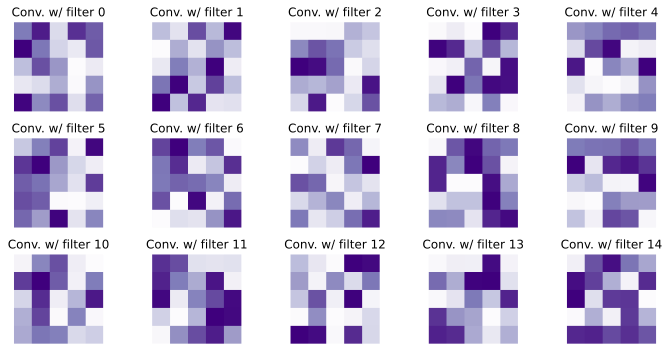

In [3]:
# What do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  #ax.set_title('L1(0)->L2(%s)'%i)
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

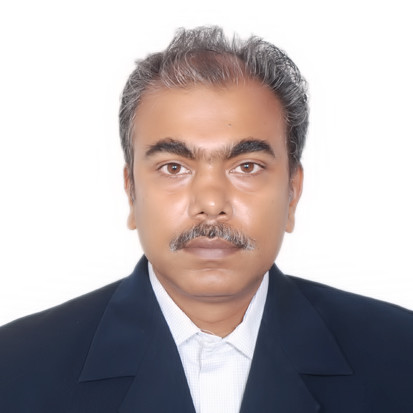

In [4]:
import requests
url = 'https://raw.githubusercontent.com/rkumar-bengaluru/data-science/main/17-Deep-Learning/12-Convolution/1530340798737.jpg'
img = Image.open(requests.get(url, stream = True).raw)
img

In [5]:
img = T.ToTensor()(img)
print("Input image size:", img.size()) # size = [3, 466, 700]
print(img.shape)

Input image size: torch.Size([3, 413, 413])
torch.Size([3, 413, 413])


In [6]:
# unsqueeze the image to make it 4D tensor
img_t = img.unsqueeze(0) # image size = [1, 3, 466, 700]
img_t.shape

torch.Size([1, 3, 413, 413])

In [7]:
convRes = c(img_t)
print(img.shape)
print(convRes.shape)

torch.Size([3, 413, 413])
torch.Size([1, 15, 409, 409])


torch.Size([3, 413, 413])
(413, 413, 3, 1)


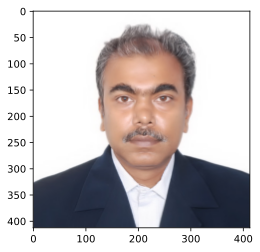

In [8]:
img2view = img_t.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

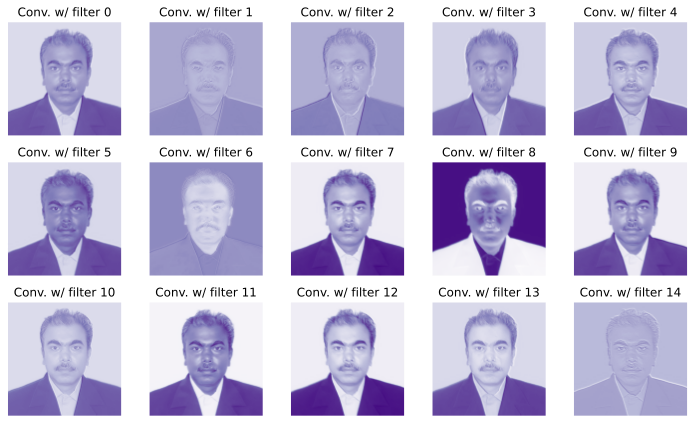

In [9]:
fig,axs = plt.subplots(3,5,figsize=(10,6))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()